# Age stuctured sturgeon model
## Trasnient response to perturbation

This note book plots the ifluence fucntions and equilbrium diagrams for the age structured sturgeon model. It will also examine the behavior of the model linearized around the equilibrium abundace to understand the impacts of perterbations.   

In [50]:
include("age_structure_model.jl")
include("fecundity_at_age.jl")
using LinearAlgebra
using Plots
using Roots

## Define paramters for age structured dynamics

In [227]:
# single paramters 
A_max = 100 # max age
A_mature = 0 # age at maturity 
f_infty = 10.0^7 # maximum fecundity 
k = 0.15 # growth rate 
a0 = 0.0 # growth paramter
s = 0.9 # survival rate


# vectorized paramters
fecundity = broadcast(x -> fecundity_at_age.isometric_LVB(x,f_infty,k,a0), 1:A_max)
survival = repeat([s],A_max)

A = age_structure_model.build_age_matrix(A_max,fecundity,survival)


100×100 Array{Float64,2}:
 27025.8  1.74106e5  4.75843e5  9.18488e5  …  9.99999e6  9.99999e6  9.99999e6
     0.9  0.0        0.0        0.0           0.0        0.0        0.0
     0.0  0.9        0.0        0.0           0.0        0.0        0.0
     0.0  0.0        0.9        0.0           0.0        0.0        0.0
     0.0  0.0        0.0        0.9           0.0        0.0        0.0
     0.0  0.0        0.0        0.0        …  0.0        0.0        0.0
     0.0  0.0        0.0        0.0           0.0        0.0        0.0
     0.0  0.0        0.0        0.0           0.0        0.0        0.0
     0.0  0.0        0.0        0.0           0.0        0.0        0.0
     0.0  0.0        0.0        0.0           0.0        0.0        0.0
     0.0  0.0        0.0        0.0        …  0.0        0.0        0.0
     0.0  0.0        0.0        0.0           0.0        0.0        0.0
     0.0  0.0        0.0        0.0           0.0        0.0        0.0
     ⋮                          

## Influence function

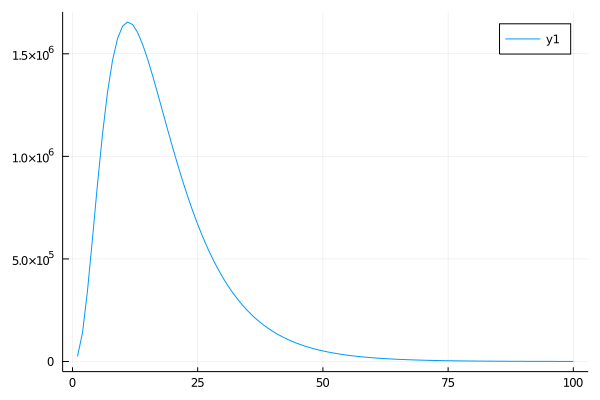

In [228]:
survived = zeros(length(survival))

for i in 1:length(survival)
    survived[i] = prod(survival[1:i])
end
Plots.plot(fecundity.*survived .* collect(1:A_max .> A_mature))

## Expected life time egg production 

In [229]:
LEP = age_structure_model.LEP(1.0, survival, fecundity, A_max )

3.714556270886202e7

## Density dependent survival 

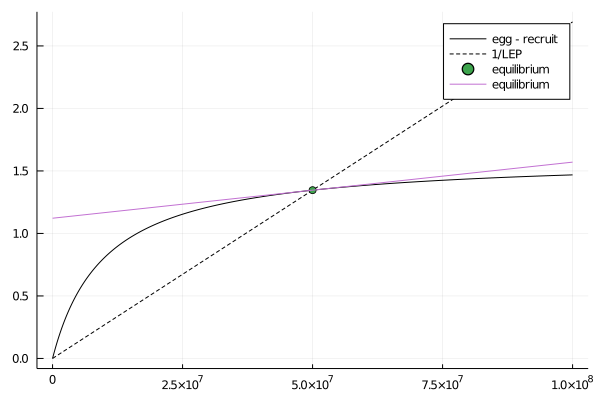

In [245]:
r = 6
a = r/LEP
b = 0.0000001
F(x,a,b) = a*x/(1+b*x)
f = x -> F(x,a,b) 
g = x -> F(x,a,b) - x/LEP
x = 0:10^5:10^8
Plots.plot(x, f.(x), color = "black", label = "egg - recruit")
Plots.plot!(x, x./LEP, color = "black", linestyle = :dash, label = "1/LEP")
x_eq = Roots.find_zero(g, (1, 10^8))
y_eq = f(x_eq)
Plots.scatter!([x_eq],[y_eq], label = "equilibrium")
Plots.plot!(x,x./(a*LEP^2) .+(f(x_eq)-x_eq/(a*LEP^2)) , label = "equilibrium")

In [246]:

J = age_structure_model.build_age_matrix(A_max,fecundity .* 1/(a*LEP^2),survival)
vals = eigen(J)
vals.values[end-2:end]

3-element Array{Complex{Float64},1}:
 0.8898225525983294 - 0.0668062994006104im
 0.8898225525983294 + 0.0668062994006104im
 0.9297928271150493 + 0.0im